# Q1 A

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']

wineData= pd.read_csv('wine.data', header=None, names=column_names)
wineData.head(10)

Class  Alcohol  Malic acid   Ash  Alcalinity of ash   Magnesium  \
0      1    14.23        1.71  2.43                15.6        127   
1      1    13.20        1.78  2.14                11.2        100   
2      1    13.16        2.36  2.67                18.6        101   
3      1    14.37        1.95  2.50                16.8        113   
4      1    13.24        2.59  2.87                21.0        118   
5      1    14.20        1.76  2.45                15.2        112   
6      1    14.39        1.87  2.45                14.6         96   
7      1    14.06        2.15  2.61                17.6        121   
8      1    14.83        1.64  2.17                14.0         97   
9      1    13.86        1.35  2.27                16.0         98   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   
5           3.27        3.39                  0.34             1.97   
6           2.50        2.52                  0.30             1.98   
7           2.60        2.51                  0.31             1.25   
8           2.80        2.98                  0.29             1.98   
9           2.98        3.15                  0.22             1.85   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735  
5             6.75  1.05                          2.85     1450  
6             5.25  1.02                          3.58     1290  
7             5.05  1.06                          3.58     1295  
8             5.20  1.08                          2.85     1045  
9             7.22  1.01                          3.55     1045

In [3]:
wineData.describe()

Class     Alcohol  Malic acid         Ash  Alcalinity of ash   \
count  178.000000  178.000000  178.000000  178.000000          178.000000   
mean     1.938202   13.000618    2.336348    2.366517           19.494944   
std      0.775035    0.811827    1.117146    0.274344            3.339564   
min      1.000000   11.030000    0.740000    1.360000           10.600000   
25%      1.000000   12.362500    1.602500    2.210000           17.200000   
50%      2.000000   13.050000    1.865000    2.360000           19.500000   
75%      3.000000   13.677500    3.082500    2.557500           21.500000   
max      3.000000   14.830000    5.800000    3.230000           30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

# Data Preprocessing

In [4]:
wineData.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [5]:
scaler = StandardScaler()
scaledDataWine = scaler.fit_transform(wineData)

In [6]:
XTrain, XTest, YTrain, YTest = train_test_split(scaledDataWine,wineData['Class'],random_state=42)

In [7]:
model = RandomForestClassifier(n_estimators=3,random_state=42)

In [8]:
model.fit(XTrain, YTrain)

RandomForestClassifier(n_estimators=3, random_state=42)

In [9]:
predictional = model.predict(XTest)
accuracy = accuracy_score(YTest, predictional)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


# Q1B

# Construct a Bayesian network (A) for the data. Visualise the network and the probability distribution. Describe a few examples of parent and child nodes.

# Network A

In [84]:
import bnlearn as bn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
XTrain, XTest, YTrain, YTest = train_test_split(scaledDataWine,wineData['Class'] )
model = RandomForestClassifier(n_estimators=3)
model.fit(XTrain, YTrain)

RandomForestClassifier(n_estimators=3)

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/91.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


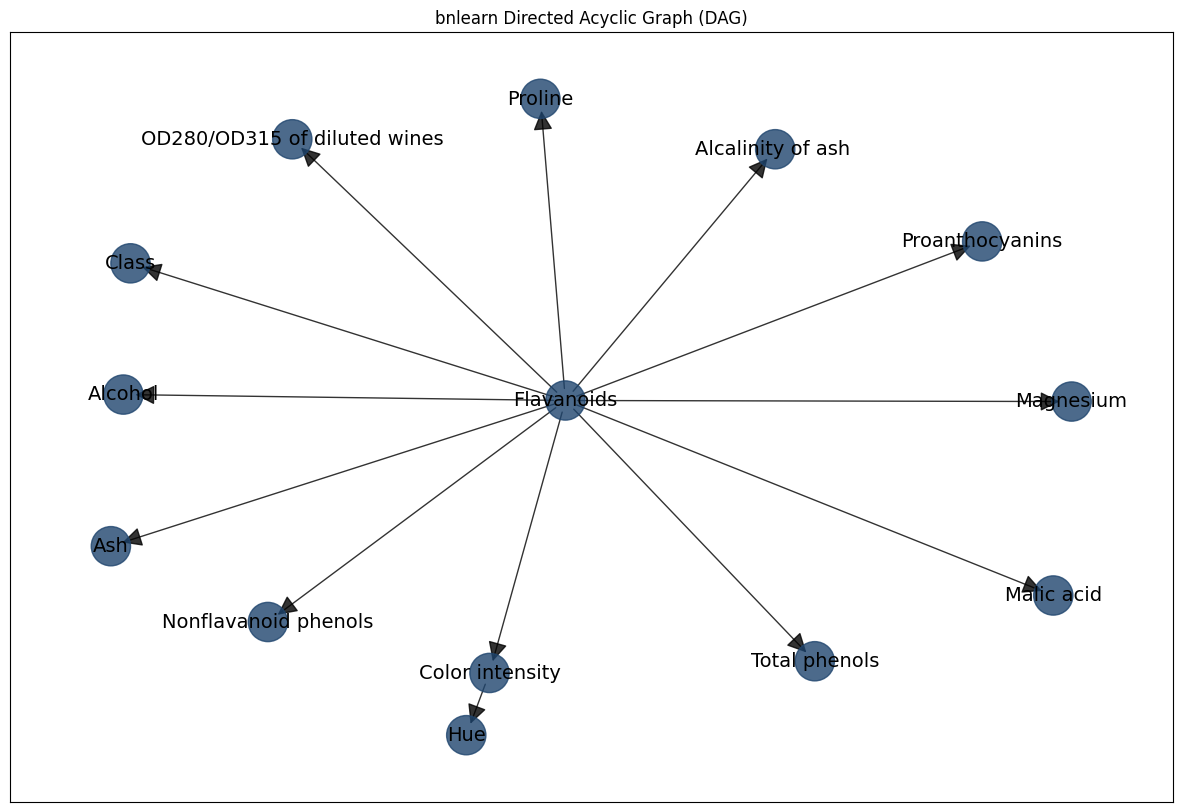

In [86]:
# Construct a Bayesian network using bnlearn
model_bn = bn.structure_learning.fit(wineData[column_names], methodtype='chow-liu', scoretype='bic')

# Plot the DAG of the Bayesian network
bn.plot(model_bn)

# Show the plot
plt.show()

# Visualise the network and the probability distribution.

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+--------

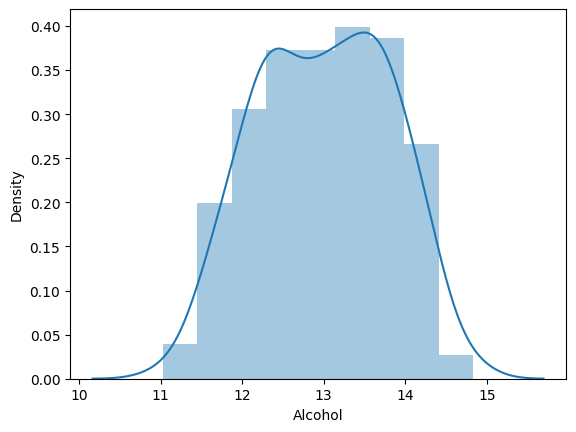

In [87]:
# Get the Conditional Probability Distribution (CPD) of the Bayesian network
model_bn_cpd = bn.parameter_learning.fit(model_bn, wineData[column_names])

# Plot the CPD of a specific node, for example, 'Alcohol'
sns.distplot(wineData['Alcohol'])
plt.show()

In [88]:
# Predict the classes for the test set
YPred = model.predict(XTest)

# Calculate the accuracy of the model
accuracy = model.score(XTest, YTest)

print(f'The accuracy of the model is: {accuracy}')

The accuracy of the model is: 0.8666666666666667


# Compute for at least 4 cases the posterior probabilities of variable(s) of interest (queries) given evidence (observations). Do the results match your intuition and/or domain knowledge? Explain your answer. (You can use API)

In [15]:
# case 1
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Alcohol': 14.23, 'Malic acid': 1.71, 'Ash': 2.43, 'Magnesium': 127}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+--------

In [16]:
# case 2
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Total phenols': 2.80, 'Flavanoids': 3.06, 'Nonflavanoid phenols': 0.28, 'Proanthocyanins': 2.29}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

In [17]:
# case 3
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Color intensity': 5.64, 'Hue': 1.04, 'OD280/OD315 of diluted wines': 3.92, 'Proline': 1065}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

In [18]:
# case 4
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Alcohol': 14.23, 'Hue': 1.04, 'Flavanoids': 3.06, 'Proline': 1065}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

# Network B

In [89]:
import bnlearn as bn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
XTrain, XTest, YTrain, YTest = train_test_split(scaledDataWine,wineData['Class'],random_state=42)
model = RandomForestClassifier(n_estimators=3 )
model.fit(XTrain, YTrain)

RandomForestClassifier(n_estimators=3)

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/78.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Edge [Flavanoids <-> Color intensity] [P=0.138614] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Flavanoids <-> Malic acid] [P=0.699421] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Flavanoids <-> Alcohol] [P=0.781472] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Flavanoids <-> OD280/OD315 of diluted wines] [P=0.348776] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Flavanoids <-> Proline] [P=0.408462] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Flavanoids <-> Total phenols] [P=0.209366] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Flavanoids <-> Ash] [P=0.213272] is excluded because it was not significa

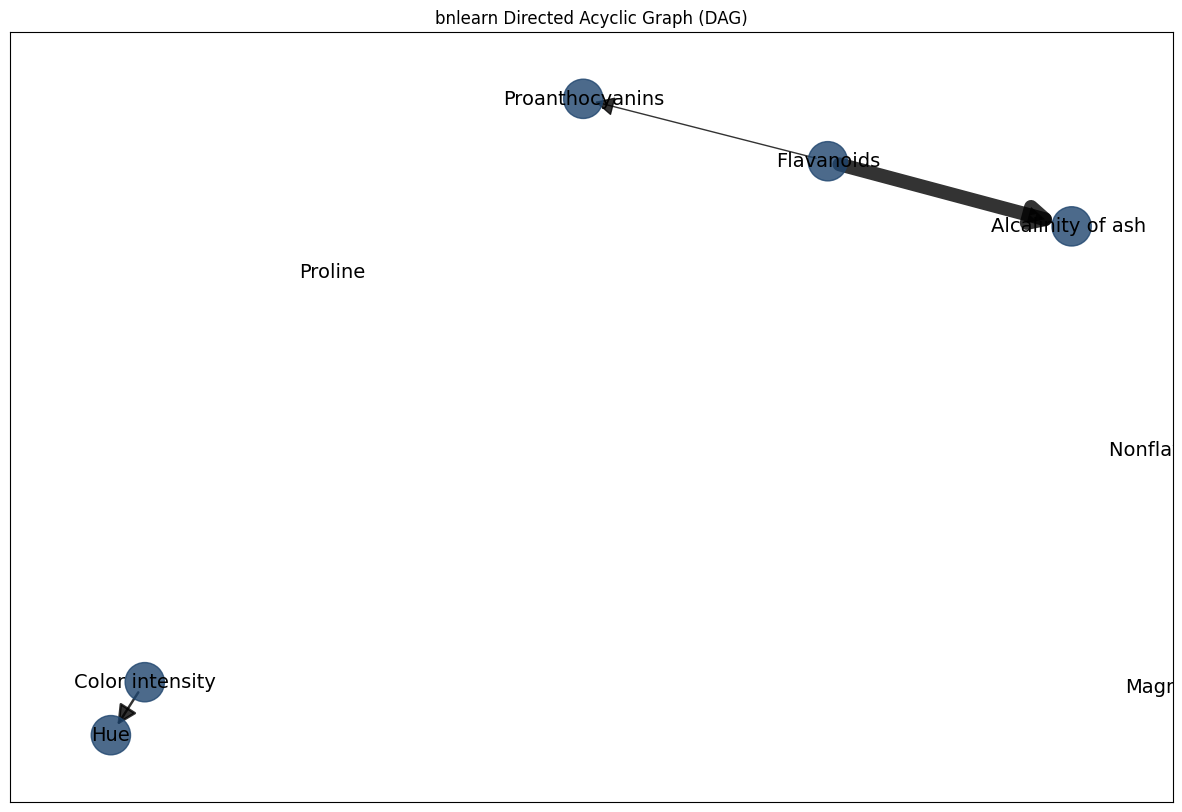

In [91]:
# Print or use the feature importances as needed
X_Axis = wineData.drop('Class', axis=1)
# Construct a Bayesian network using bnlearn
modelBn = bn.structure_learning.fit(X_Axis, methodtype='chow-liu', scoretype='bic')  # Use the scaled features
# Assuming you have already constructed the Bayesian network structure model_bn
# model_bn = bn.structure_learning.fit(X, methodtype='chow-liu', scoretype='bic')

# Assuming X is the scaled data DataFrame
model1 = bn.independence_test(modelBn, X_Axis, alpha=0.05, prune=True)

# Plot the DAG of the Bayesian network
bn.plot(model1)

# Show the plot
plt.show()

# Visualise the network and the probability distribution.

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

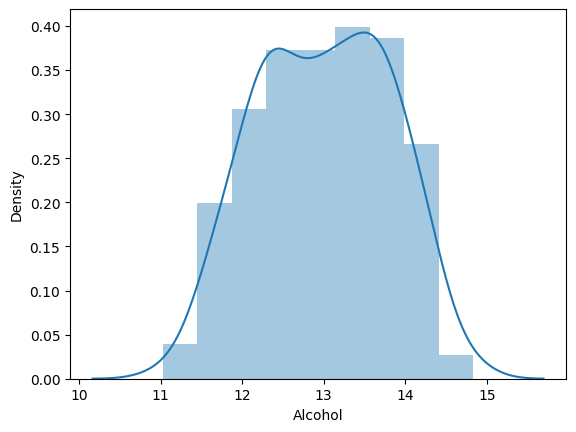

In [76]:
# Get the Conditional Probability Distribution (CPD) of the Bayesian network
model_bn_cpd = bn.parameter_learning.fit(model_bn, wineData[column_names])

# Plot the CPD of a specific node, for example, 'Alcohol'
sns.distplot(wineData['Alcohol'])
plt.show()

In [92]:
# Predict the classes for the test set
YPred = model.predict(XTest)

# Calculate the accuracy of the model
accuracy = model.score(XTest, YTest)

print(f'The accuracy of the model is: {accuracy}')

The accuracy of the model is: 0.9555555555555556


# Compute for at least 4 cases the posterior probabilities of variable(s) of interest (queries) given evidence (observations). Do the results match your intuition and/or domain knowledge? Explain your answer. (You can use API)

In [24]:
# case 1
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Alcohol': 14.23, 'Malic acid': 1.71, 'Ash': 2.43, 'Magnesium': 127}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

In [25]:
# case 2
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Total phenols': 2.80, 'Flavanoids': 3.06, 'Nonflavanoid phenols': 0.28, 'Proanthocyanins': 2.29}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

In [26]:
# case 3
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Color intensity': 5.64, 'Hue': 1.04, 'OD280/OD315 of diluted wines': 3.92, 'Proline': 1065}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

In [27]:
# case 4
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Alcohol': 14.23, 'Hue': 1.04, 'Flavanoids': 3.06, 'Proline': 1065}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

# New Improved Network A

In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import bnlearn as bn
import matplotlib.pyplot as plt

In [101]:
# Load the data
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wineData = pd.read_csv('wine.data', header=None, names=column_names)

# Feature scaling
scaler = StandardScaler()
scaledDataWine = scaler.fit_transform(wineData.drop('Class', axis=1))  # Exclude the target variable 'Class'

# Split the data into training and testing sets
XTrain, XTest, YTrain, YTest = train_test_split(scaledDataWine, wineData['Class'], random_state=42)


[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/91.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


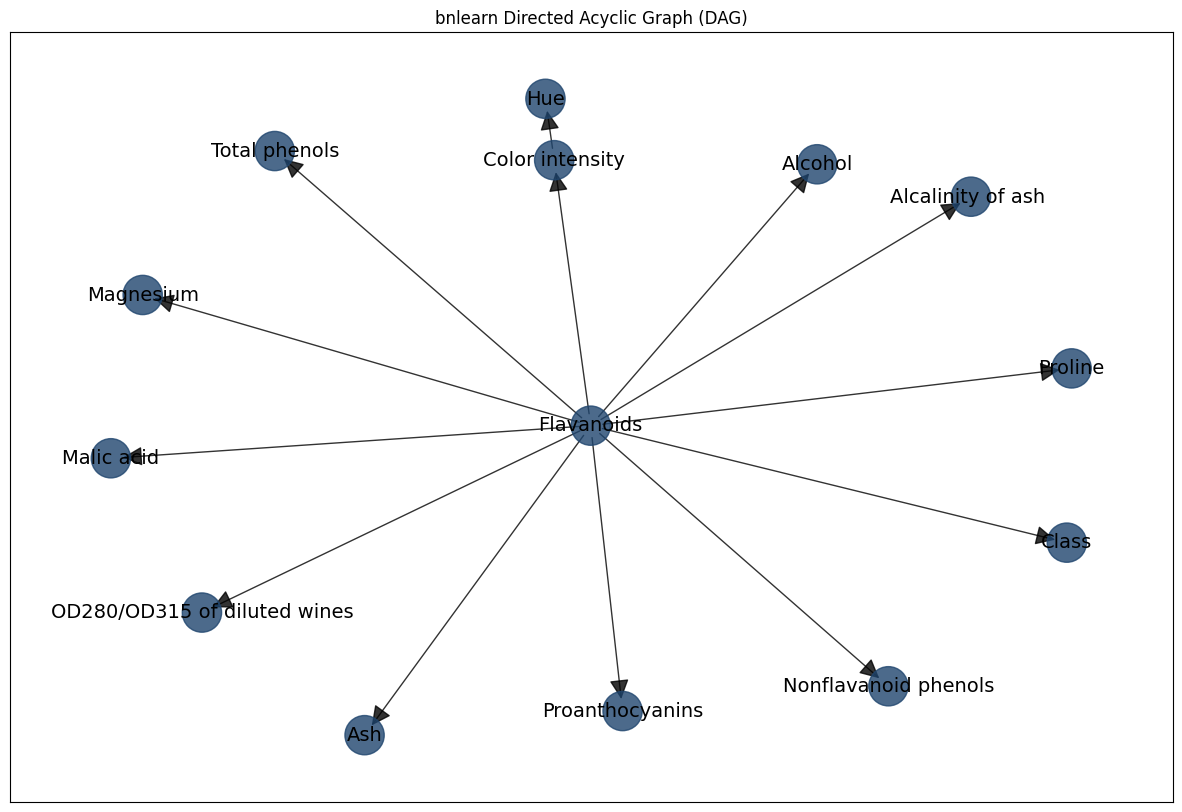

In [102]:
 # Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Initializing a RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the model and parameter grid
RandomMizedSearch = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=5, n_jobs=-1,random_state=42)

# Fitting the model
RandomMizedSearch.fit(XTrain, YTrain)


 

# Construct a Bayesian network using bnlearn
modelBN = bn.structure_learning.fit(wineData[column_names], methodtype='chow-liu', scoretype='bic')

# Plot the DAG of the Bayesian network
bn.plot(modelBN)

# Show the plot
plt.show()


# Visualise the network and the probability distribution.

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

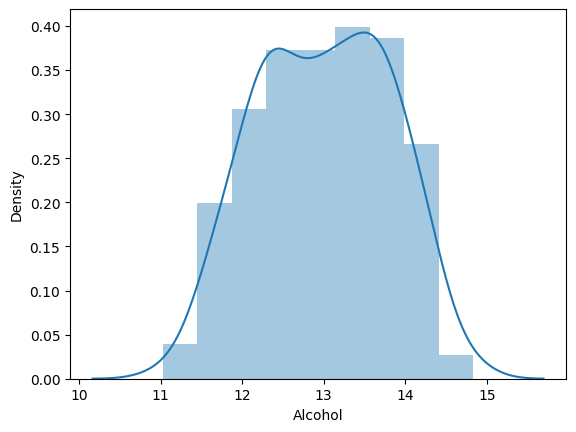

In [31]:
# Get the Conditional Probability Distribution (CPD) of the Bayesian network
model_bn_cpd = bn.parameter_learning.fit(model_bn, wineData[column_names])

# Plot the CPD of a specific node, for example, 'Alcohol'
sns.distplot(wineData['Alcohol'])
plt.show()

In [103]:
# Predict the classes for the test set
YPred = model.predict(XTest)

# Calculate the accuracy of the model
accuracy = model.score(XTest, YTest)

print(f'The accuracy of the model is: {accuracy}')

The accuracy of the model is: 0.9555555555555556


# Compute for at least 4 cases the posterior probabilities of variable(s) of interest (queries) given evidence (observations). Do the results match your intuition and/or domain knowledge? Explain your answer. (You can use API)

In [33]:
# case 1
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Alcohol': 14.23, 'Malic acid': 1.71, 'Ash': 2.43, 'Magnesium': 127}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

In [34]:
# case 2
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Total phenols': 2.80, 'Flavanoids': 3.06, 'Nonflavanoid phenols': 0.28, 'Proanthocyanins': 2.29}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

In [35]:
# case 3
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Color intensity': 5.64, 'Hue': 1.04, 'OD280/OD315 of diluted wines': 3.92, 'Proline': 1065}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

In [36]:
# case 4
model_bn = bn.parameter_learning.fit(model_bn, wineData[column_names])
evidence = {'Alcohol': 14.23, 'Hue': 1.04, 'Flavanoids': 3.06, 'Proline': 1065}
query = bn.inference.fit(model_bn, variables=['Class'], evidence=evidence)
print(query)

[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Proline
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Ash
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash 
[datazets] >WARNING> Replacing existing CPD for Magnesium
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Class
[datazets] >WARNING> Replacing existing CPD for Hue


[bnlearn] >CPD of Flavanoids:
+------------------+------------+
| Flavanoids(0.34) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.47) | 0.00812883 |
+------------------+------------+
| Flavanoids(0.48) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.49) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.5)  | 0.00812883 |
+------------------+------------+
| Flavanoids(0.51) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.52) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.55) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.56) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.57) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.58) | 0.00897772 |
+------------------+------------+
| Flavanoids(0.6)  | 0.00897772 |
+------------------+------------+
| Flavanoids(0.61) | 0.00727993 |
+------------------+------------+
| Flavanoids(0.63) | 0.00727993 |
+-----------------

# Use feature selection method {https://scikit-learn.org/stable/modules/ feature selection.html} on the data and construct a Bayesian network on new data (C). Plot the probability distribution P(class|F1, F2) to F1 and F2 where F1 and F2 are features that are significant for the class prediction. Describe the change in probability distribution ? (Whether it is the same ?(why/why not) ) (Example fig:14.6 page 521 in the book Artificial Intelligence: A Modern Approach by Russsell & Norvig, 3rd edition)

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import bnlearn as bn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

In [68]:
# Load the data
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wineData = pd.read_csv('wine.data', header=None, names=column_names)

# Feature scaling
# Feature scaling
scaler = StandardScaler()
scaledDataWine = scaler.fit_transform(wineData )  # Exclude the target variable 'Class'

# Convert numpy array back to DataFrame
scaledDataWine = pd.DataFrame(scaledDataWine, columns=wineData.columns)  # Exclude the target variable 'Class'

# Split the data into training and testing sets
XTrain, XTest, YTrain, YTest = train_test_split(scaledDataWine, wineData['Class'], random_state=42)

[datazets] >WARNING> BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.


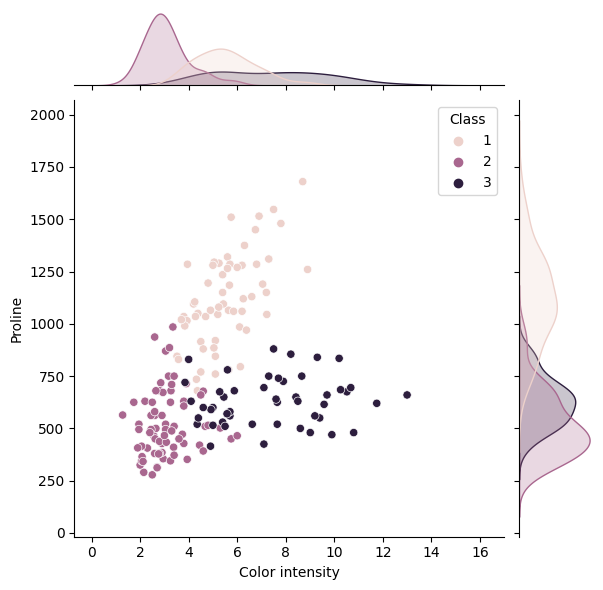

In [81]:
# Feature selection
XAxis = wineData.drop('Class', axis=1)
yAxis = wineData['Class']
selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X_Axis, yAxis)
F1, F2 = X.columns[selector.get_support(indices=True)]

# Construct Bayesian network
model = BayesianModel([(F1, 'Class'), (F2, 'Class')])

# Fit the data to the model
model.fit(wineData, estimator=MaximumLikelihoodEstimator)

# Probability distribution

sns.jointplot(data=wineData, x=F1, y=F2, hue='Class')
plt.show()

In [71]:


# Generate predictions for the test set
YPred = model.predict(XTest)

# Calculate the accuracy of the model
accuracy = accuracy_score(YTest, YPred)

print(f"Accuracy: {accuracy}")


ValueError: Data has variables which are not in the model

# Compute for at least 4 cases the posterior probabilities of variable(s)
# of interest (queries) given evidence (observations). Do the results match your
# intuition and/or domain knowledge? Explain your answer. (You can use API)